In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_2'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_2


In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('kddcup.data/kddcup.data.corrected', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [6]:
df.shape

(4898431, 42)

In [7]:
cols = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
        'logged_in', 'lnum_compromised', 'lroot_shell', 'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells', 'lnum_access_files', 
        'lnum_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 
        'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
        'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate',
        'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label']

In [8]:
df.columns = cols
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [9]:
df.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
4898426,0,tcp,http,SF,212,2288,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,32,0.0,0.0,0.0,0.0,1.0,0.0,0.16,3,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,33,0.0,0.0,0.0,0.0,1.0,0.0,0.15,4,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,34,0.0,0.0,0.0,0.0,1.0,0.0,0.15,5,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,35,0.0,0.0,0.0,0.0,1.0,0.0,0.14,6,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.
4898430,0,tcp,http,SF,219,1098,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,7,255,1.0,0.0,0.14,0.05,0.0,0.01,0.0,0.0,normal.


In [10]:
df.label.value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: label, dtype: int64

In [11]:
df.duplicated().sum()

3823439

In [12]:
df = df.drop_duplicates()
df.shape

(1074992, 42)

In [13]:
df.label.value_counts()

normal.             812814
neptune.            242149
satan.                5019
ipsweep.              3723
portsweep.            3564
smurf.                3007
nmap.                 1554
back.                  968
teardrop.              918
warezclient.           893
pod.                   206
guess_passwd.           53
buffer_overflow.        30
warezmaster.            20
land.                   19
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [14]:
df.label = df.label.apply(lambda x: 0 if x =='normal.' else (1 if x == 'neptune.' else 2))

In [15]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,lroot_shell,lsu_attempted,lnum_root,lnum_file_creations,lnum_shells,lnum_access_files,lnum_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,162,4528,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,236,1228,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,233,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0


In [16]:
X = df.iloc[:, 0:41].values
y = df.iloc[:, 41].values

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('encoder', OneHotEncoder(handle_unknown='ignore'), [1,2,3])],
                          remainder='passthrough')
X = ct.fit_transform(X.tolist())

In [18]:
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
encoder.fit(y)
encoder_y = encoder.transform(y)
dummy_y = to_categorical(encoder_y)

In [19]:
y = dummy_y

In [20]:
X.shape

(1074992, 122)

In [21]:
y.shape

(1074992, 3)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
import pickle
scalerfile = 'sc.sav'
pickle.dump(sc, open(scalerfile, 'wb'))

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [24]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

In [25]:
# Intitialing the ANN
classifier = Sequential()

In [26]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 63, activation='relu', input_shape=(122,)))
classifier.add(Dropout(rate=0.1))

In [27]:
classifier.add(Dense(units = 63, activation='relu'))
classifier.add(Dropout(rate=0.1))

In [28]:
classifier.add(Dense(units = 3,
                      activation='softmax'))

In [29]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 63)                7749      
                                                                 
 dropout (Dropout)           (None, 63)                0         
                                                                 
 dense_1 (Dense)             (None, 63)                4032      
                                                                 
 dropout_1 (Dropout)         (None, 63)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 192       
                                                                 
Total params: 11,973
Trainable params: 11,973
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = classifier.fit(X_train, y_train,
                          epochs = 50,
                          batch_size=32,
                          validation_data=(X_test, y_test))

Epoch 1/50
23516/23516 [==============================] - 55s 2ms/step - loss: 0.0096 - accuracy: 0.9978 - val_loss: 0.0042 - val_accuracy: 0.9988
Epoch 2/50
23516/23516 [==============================] - 54s 2ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0035 - val_accuracy: 0.9989
Epoch 3/50
23516/23516 [==============================] - 54s 2ms/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.0041 - val_accuracy: 0.9990
Epoch 4/50
23516/23516 [==============================] - 54s 2ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9990
Epoch 5/50
23516/23516 [==============================] - 54s 2ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 6/50
23516/23516 [==============================] - 54s 2ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 7/50
23516/23516 [==============================] - 54s 2ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0

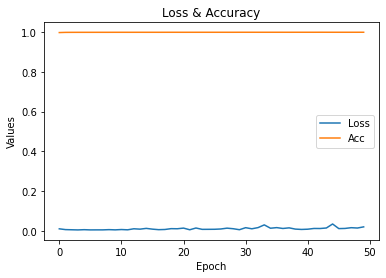

In [32]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('Loss & Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Acc'])
plt.show()

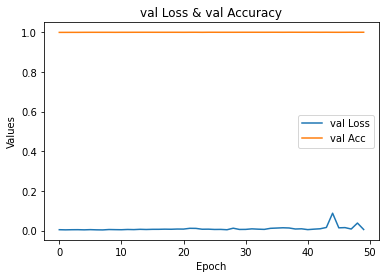

In [33]:
plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.title('val Loss & val Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['val Loss', 'val Acc'])
plt.show()

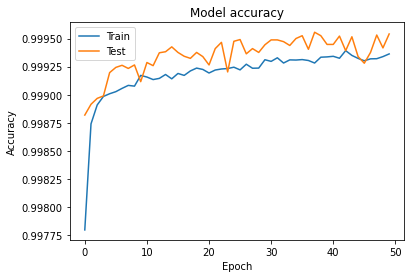

In [34]:
# so sanh acc giua train vs test: overfitting? underfitting? => No
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
y_pred.round(0)[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [37]:
y_test[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [38]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred.round(0))
accuracy

0.9995410824253174

In [39]:
print(classification_report(y_test, y_pred.round(0)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    243744
           1       1.00      1.00      1.00     72733
           2       0.99      0.98      0.99      6021

   micro avg       1.00      1.00      1.00    322498
   macro avg       1.00      0.99      1.00    322498
weighted avg       1.00      1.00      1.00    322498
 samples avg       1.00      1.00      1.00    322498



In [40]:
# Ghi model:
import pickle
def Save_Object(obj, filename):
    with open(filename, 'wb') as file:
        pickle.dump(obj, file)
    return
# load the model back from file:
def Load_Object(filename):
    with open(filename, 'rb') as file:
        obj = pickle.load(file)
    return obj

In [41]:
Save_Object(ct, 'ColumnTransformer.pkl')

In [42]:
from tensorflow.keras.models import load_model
classifier.save('kddcup.h5')
print('Save!')

Save!
